# Project: Exploratory Data Analysis of Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook I'm going to analyze the dataset [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments).
This dataset consists of 100k+ medical appointments in Brazil.  
The focus of the dataset is to answer the following question:
##### Why do people not show up to a medical appointment?
  
  
  
Following information is provided for each appointment:
* PatientId: patient unique identification
* AppointmentID: appointment unique identification
* Gender: patient gender
* ScheduledDay: appointment scheduled date
* AppointmentDay: appointment date
* Age: patient age
* Neighbourhood: where the appointment took place
* Scholarship: tells if patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
* Hipertension: indicates if patient have hipertension
* Diabetes: indicates if patient has diabetes
* Alcoholism: indicates if patient has alcoholism
* Handcap: indicates number of disabilities
* SMS_received: indicates if the patient received at least one sms reminder about the appointment
* No-show: indicates if the patient attended the appointment

To answer the basic question following questions can be addressed based on the dataset:
  1.  Does the time span between appointment scheduled day and appointment day affect the patient's absence?
  2.  Does the week day of the appointment affect a patient's absence?
  3.  Is it relevant whether there is a weekend in between the day when an appointment was scheduled and the day of the appointment 
  4.  Do people with specific health features (diabetes, hipertension...) tend to not show up
  5.  Are there time spans in the dataset where people showed up less
  6.  Do particular patients have an impact on the statistic, i.e. because the miss appointments on a regular basis
  7.  Does the neighborhood where an appointment took place have an affect on showing up or not
  8.  Does the enrollment to the welfare program have an affect on showing up or not
  9.  Do people of a specific age or gender tend to not show up? 
  
Considering the available time for the project, I'm going to focus on the first two questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Data/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# get information about fields, missing data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


First of all there seems to be no missing data in terms of null values.   
__ScheduledDay__ and __AppointmentDay__ are strings which will have to be converted to date types if used for analysis.

In [4]:
#get the size of the dataset
df.shape

(110527, 14)

The dataset consists of 110527 lines and 14 columns.

In [5]:
#display first lines of data to get an ideo of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


__AppointmentDay__ seems to have no time attached while __ScheduledDay__ has a timestamp

In [6]:
#check if AppointmentDay contains timestamp other than 00:00:00
df.query('~AppointmentDay.str.contains("00:00:00")')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [7]:
# get more information about numeric columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Handcap has 4 as max value. Let's have a closer look there.

In [8]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

According to the data description on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments) this should be True or False. The dataset creator marks in this [discussion](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699) that the number is actually the number of handicaps of a single patient.

In [9]:
#look at the details
df.groupby(['Handcap', 'No-show']).count()['Alcoholism']

Handcap  No-show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: Alcoholism, dtype: int64

The number doesn't have to have a huge impact, so I'm going to ignore this later.

In [10]:
# How many different values and counts are in the Neighbourhood column
df.Neighbourhood.value_counts().tail(10)

UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: Neighbourhood, dtype: int64

What do we see above:  
* Age: Patients are around 37 years old on average. The oldest patient is 115 years old. We'll have to have a closer look at the -1 as minimum age. Could be a mistake or a dataset to drop later.  
* Scholarship: Around 10% of the patients are enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
* There are several desease characteristics of the patients recorded (Hipertension ~20%, Diabetes ~7%, Alcoholism ~3%). Handicap data doesn't fit to the data description information as already mentioned above.
* SMS_received: About one third of the patients received at least one SMS.
* We have more than 80 different neighbourhood values. Some of them only provide few patient appointment records.
* No-show is the most relevant column because we want to analyze why patiants didn't show up.

### Data Cleaning

In [11]:
#check for duplicates in the dataset
sum(df.duplicated())

0

No duplicates to delete.

In [12]:
# change column names to lower case for convenience
df.rename(columns=lambda x: x.lower(), inplace=True)
# rename some columns again
df.rename(columns={'patientid': 'patient_id', 'no-show': 'no_show', 'scheduledday': 'scheduled_day', 'appointmentday':'appointment_day'}, inplace=True)
df.head()

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


There is no need to have the patientid as float, so I convert it to object

In [13]:
#change patient id to object
df['patient_id'] = df['patient_id'].astype(object)

In [14]:
'Unique values in appointmentid:{0}, absolute number of appointmentid:{1}'.format(len(df['appointmentid'].unique()), len(df['appointmentid']))

'Unique values in appointmentid:110527, absolute number of appointmentid:110527'

I don't need the appointmentid for analysis since it's unique. So let's drop it.

In [15]:
df.drop(columns=['appointmentid'], inplace=True)

Next I'm going to convert the feature colums to boolean.  
Since handcap has a count in it I've to flatten the data first.

In [16]:
#convert handcap to boolean
df['handcap'] = df.handcap > 0

In [17]:
#convert other feature columns to boolean
feature_columns = ['scholarship','hipertension','diabetes','alcoholism','sms_received']
for col in feature_columns:
    df[col] = df[col].astype('bool')

To work with the appointment dates we'll have to remove the time stamps first

In [18]:
# strip timestamp
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date
#change scheduledday and appointmentday to date
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  object        
 1   gender           110527 non-null  object        
 2   scheduled_day    110527 non-null  datetime64[ns]
 3   appointment_day  110527 non-null  datetime64[ns]
 4   age              110527 non-null  int64         
 5   neighbourhood    110527 non-null  object        
 6   scholarship      110527 non-null  bool          
 7   hipertension     110527 non-null  bool          
 8   diabetes         110527 non-null  bool          
 9   alcoholism       110527 non-null  bool          
 10  handcap          110527 non-null  bool          
 11  sms_received     110527 non-null  bool          
 12  no_show          110527 non-null  object        
dtypes: bool(6), datetime64[ns](2), int64(1), object(4)
memory usage: 6.5+ MB


Last thing to do is to change no_show to boolean also

In [19]:
#first check if values are only Yes/No
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
# values are fine - convert to bool
df['no_show'] = df['no_show'] == 'Yes'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  object        
 1   gender           110527 non-null  object        
 2   scheduled_day    110527 non-null  datetime64[ns]
 3   appointment_day  110527 non-null  datetime64[ns]
 4   age              110527 non-null  int64         
 5   neighbourhood    110527 non-null  object        
 6   scholarship      110527 non-null  bool          
 7   hipertension     110527 non-null  bool          
 8   diabetes         110527 non-null  bool          
 9   alcoholism       110527 non-null  bool          
 10  handcap          110527 non-null  bool          
 11  sms_received     110527 non-null  bool          
 12  no_show          110527 non-null  bool          
dtypes: bool(7), datetime64[ns](2), int64(1), object(3)
memory usage: 5.8+ MB


In [22]:
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False


Now Data Cleaning is finished, let's move on to exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does the time span between appointment scheduled day and appointment day affect the patient's absence?

First I have a look at the time span of the appointments of the dataset.

In [23]:
'The time span of the appointment of the dataset is {}'.format((df.appointment_day.max() - df.appointment_day.min()))

'The time span of the appointment of the dataset is 40 days 00:00:00'

To answer the question it is necessary to have a new computed column waiting_days to get the time a patient had to wait from __Appointment Day__ to __Scheduled Day__ for later analysis

In [24]:
# Create a new column waiting_days to get the number of days between the appointment day and the appointment scheduled day
df['waiting_days'] = (df['appointment_day'] - df['scheduled_day']).astype('timedelta64[D]')

In [25]:
# look at the result
df.waiting_days.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

We see a data inconsistency we missed when clearing the data. The result shows entries below 0. This means the appointment is before the scheduled date. So were going to deal with it here.

In [26]:
# look at the entries below 0
df.query('waiting_days == 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,29872499824296.0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,0.0
1,558997776694438.0,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,0.0
2,4262962299951.0,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,0.0
3,867951213174.0,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,0.0
4,8841186448183.0,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,823599626588.0,F,2016-06-08,2016-06-08,14,MARIA ORTIZ,False,False,False,False,False,False,False,0.0
110512,98762456447375.0,F,2016-06-08,2016-06-08,41,MARIA ORTIZ,False,False,False,False,False,False,False,0.0
110513,86747784995281.0,M,2016-06-08,2016-06-08,2,ANTÔNIO HONÓRIO,False,False,False,False,False,False,False,0.0
110514,2695685177138.0,F,2016-06-08,2016-06-08,58,MARIA ORTIZ,False,False,False,False,False,False,False,0.0


In [27]:
df.no_show.value_counts()

False    88208
True     22319
Name: no_show, dtype: int64

These are all no_show entries but only six of more than 20000, so I'm going to drop these.

In [28]:
# drop entries
df = df.query('waiting_days >= 0')
# check
df.query('waiting_days < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days


Having the waiting_days we can check out if there is a difference between people who showed up and people who didn't.

In [29]:
#create masks for present and absent patients
present = df['no_show'] == False
absent = df['no_show'] == True

First we have a look at the waiting_days, telling the time span between appointment scheduled day and appointment day

In [30]:
df[present].waiting_days.describe()

count    88208.000000
mean         8.754659
std         14.550398
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        179.000000
Name: waiting_days, dtype: float64

In [31]:
df[absent].waiting_days.describe()

count    22314.000000
mean        15.835484
std         16.605600
min          0.000000
25%          4.000000
50%         11.000000
75%         23.000000
max        179.000000
Name: waiting_days, dtype: float64

We can see a correlation between waiting days and 

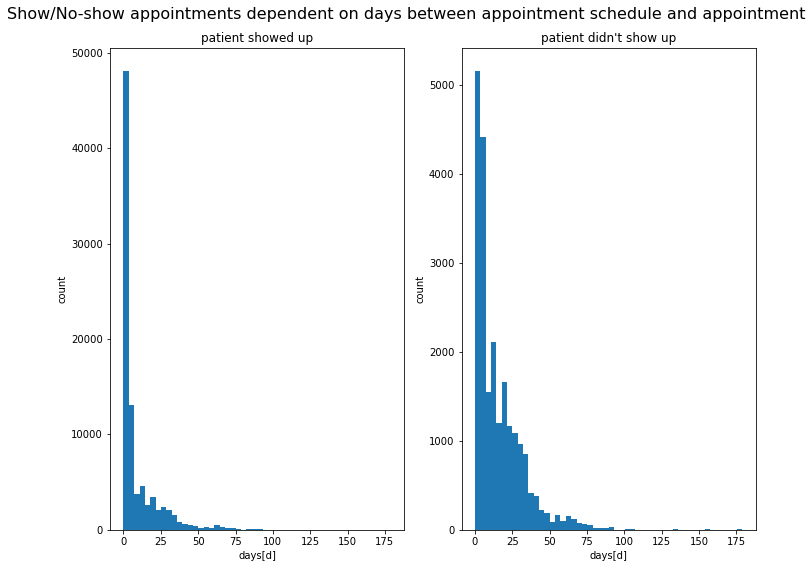

In [32]:
fig, ax = plt.subplots(1, 2, tight_layout=True)
n_bins = 50
fig.set_figheight(8)
fig.set_figwidth(10)
fig.suptitle('Show/No-show appointments dependent on days between appointment schedule and appointment', fontsize=16)
# We can set the number of bins with the `bins` kwarg
ax[0].hist(df[present].waiting_days, bins=n_bins)
ax[1].hist(df[absent].waiting_days, bins=n_bins)
ax[0].set_title("patient showed up")
ax[1].set_title("patient didn't show up")
ax[0].set_ylabel('count')
ax[0].set_xlabel('days[d]')
ax[1].set_ylabel('count')
ax[1].set_xlabel('days[d]');

Both histograms are skewed to the right, but the one were patients showed up is even more skewed to the right.  
To make this correlation clearer I'm going to visualize it as box diagram. I'm going to ignore outliers to have a clearer view on the overall picture.

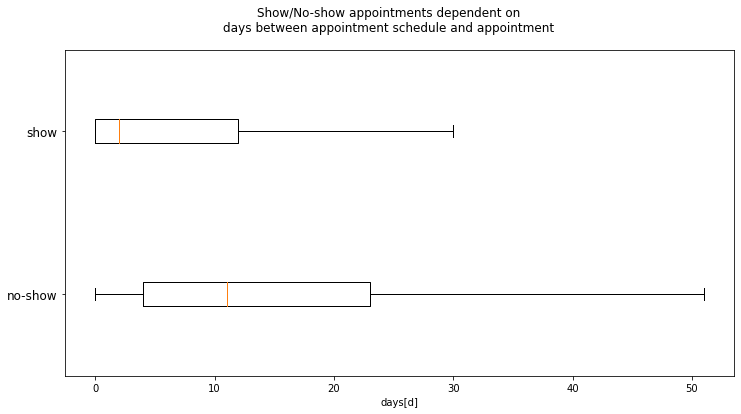

In [33]:
# show box diagram without outliers

fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)
fig.suptitle('Show/No-show appointments dependent on\ndays between appointment schedule and appointment', fontsize=12)

ax.boxplot([df[absent].waiting_days, df[present].waiting_days], 0, '', 0)
ax.set_yticks([1, 2])
ax.set_yticklabels(['no-show','show'], fontsize=12)
ax.set_xlabel('days[d]')

plt.show()


### Research Question 2: Does the week day of the appointment affect a patient's absence?

To answer this question we already did some It would be good to have a new computed column waiting_days to get the time a patient had to wait from Appointment Day to Scheduled Day for later analysis

In [34]:
df.waiting_days.describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

In [35]:
df['weekday_appmnt'] = df['appointment_day'].dt.dayofweek
df['weekday_scheduled'] = df['scheduled_day'].dt.dayofweek

In [36]:
# get weekdays for present and absent days
weekday_present_counts = df[present].weekday_appmnt.value_counts().sort_index()
weekday_present_absolute = df[present].weekday_appmnt.count()
weekday_absent_counts = df[absent].weekday_appmnt.value_counts().sort_index()
weekday_absent_absolute = df[absent].weekday_appmnt.count()

# check values
print('No Show-up on weekdays:\n{}'.format(weekday_absent_counts))
print('Show-up on weekdays:\n{}'.format(weekday_present_counts))

# get proportions
prop_weekday_present = weekday_present_counts/weekday_present_absolute
prop_weekday_absent = weekday_absent_counts/weekday_absent_absolute

# check result - should be 1.0 or very close to it
print(sum(prop_weekday_present))
print(sum(prop_weekday_absent))

No Show-up on weekdays:
0    4689
1    5150
2    5092
3    3337
4    4037
5       9
Name: weekday_appmnt, dtype: int64
Show-up on weekdays:
0    18025
1    20488
2    20774
3    13909
4    14982
5       30
Name: weekday_appmnt, dtype: int64
1.0000000000000002
1.0


In [37]:
def drawGroupedBarChart(vals1, vals2, label_vals1='data1', label_vals2='data2', chart_title='', name_xlabel='', name_ylabel='',  x_tick_labels=[], bar_width=0.35, color1='b', color2='r', alpha1=0.7, alpha2=0.7):

    ind = np.arange(len(vals1))  # the x locations for the groups
    vals_present = list(vals1.values)
    vals_absent = list(vals2.values)

    # plot bars
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(10)

    bars_weekdays_present  = ax.bar(ind, vals_present, bar_width, color=color1, alpha=alpha1, label=label_vals1)
    bars_weekdays_absent = ax.bar(ind + bar_width, vals_absent, bar_width, color=color2, alpha=alpha2, label=label_vals2)

    # title and labels
    ax.set_ylabel(name_ylabel)
    ax.set_xlabel(name_xlabel)
    ax.set_title(chart_title)
    locations = ind + bar_width / 2  # xtick locations 
    ax.set_xticks(locations)
    ax.set_xticklabels(x_tick_labels)

    # legend
    ax.legend()
    fig.show

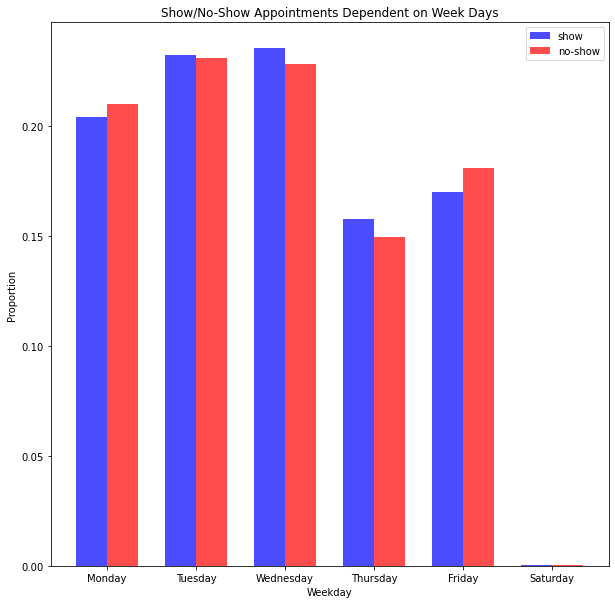

In [38]:
 #weekdays dict w/o Sunday
week_days = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday'
]

title = 'Show/No-Show Appointments Dependent on Week Days'
drawGroupedBarChart(prop_weekday_present, prop_weekday_absent, chart_title=title, name_xlabel='Weekday', name_ylabel='Proportion', label_vals1='show', label_vals2='no-show', x_tick_labels=week_days)

For both groups (show and no-show) we see a higher number of appointments at the beginning of the week (Monday to Wednesday).
Ignoring Saturdays with few appointments we see that patients tend to not show up at the beginning or end of the week.

We saw in the histogram that many appointment were scheduled the same day - knowing that waiting time affects patients' presence and many appointments are on the same day the appointment was scheduled, I'm now going to ignore the same day appointments to look at the impact.

In [39]:
# sort out same day appointments
# get weekdays for present and absent days
present_not_same_day = (df['no_show'] == False) & (df['waiting_days'] > 0.0)
absent_not_same_day = (df['no_show'] == True) & (df['waiting_days'] > 0.0)

wd_present_not_same_day_counts = df[present_not_same_day].weekday_appmnt.value_counts().sort_index()
wd_present_not_same_day_absolute = df[present_not_same_day].weekday_appmnt.count()
wd_absent_not_same_day_counts = df[absent_not_same_day].weekday_appmnt.value_counts().sort_index()
wd_absent_not_same_day_absolute = df[absent_not_same_day].weekday_appmnt.count()

# get proportions
prop_wd_present_not_same_day = wd_present_not_same_day_counts/wd_present_not_same_day_absolute
prop_wd_absent_not_same_day = wd_absent_not_same_day_counts/wd_absent_not_same_day_absolute

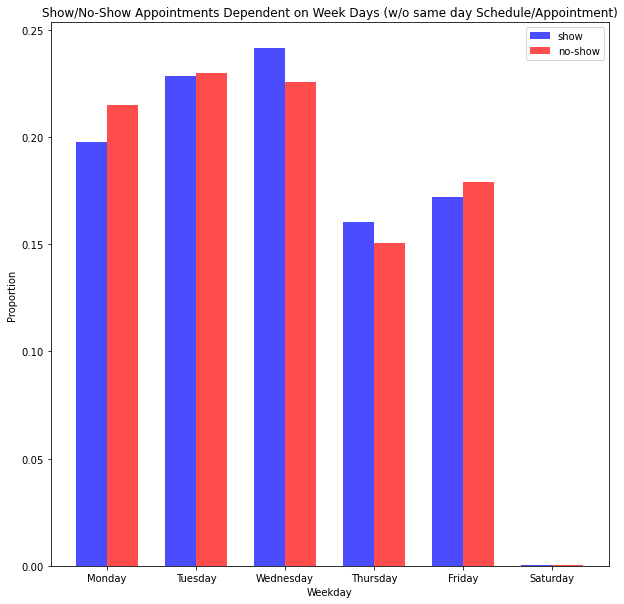

In [40]:
title = 'Show/No-Show Appointments Dependent on Week Days (w/o same day Schedule/Appointment)'
drawGroupedBarChart(prop_wd_present_not_same_day, prop_wd_absent_not_same_day, chart_title=title, name_xlabel='Weekday', name_ylabel='Proportion', label_vals1='show', label_vals2='no-show', x_tick_labels=week_days)

Again ignoring Saturdays we can see an increasing difference between no-shows and shows in the beginning of the week while decreasing on Friday.

<a id='conclusions'></a>
## Conclusions

### Results:
I was looking at the dataset addressing the following to questions.

* Does the time span between appointment scheduled day and appointment day affect the patient's absence?
* Does the week day of the appointment affect a patient's absence?

In both cases there is a correlation between the dependent variable no_show and the independent variables.

1. We see that appointments where patients didn't show up have a relation to the number of waiting days in between the day where the appointment was scheduled and the day of the appointment.
2. Weekdays: There is a proportinal higher rate of no-shows at the beginning or end of the week.

### Limitations:
1. There may be other correlations I didn't check on like relation between gender and show/no-shows that also have affect the weekdays or waiting time. Therefore results are preliminary and maybe different when looking on other factors, too.
2. We do not know how the data was raised and therefore can't draw conclusions.
3. The dataset's covers only 40 days of appointments which is quite a small sample. So time based information like __season of the year__ could also affect the findings.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1